In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.1


In [2]:
# Load Dataset

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Set Label List
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [5]:
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


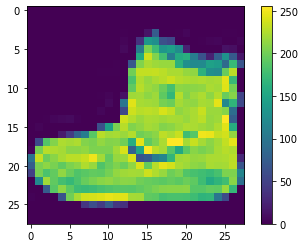

In [7]:
# Data Preprocessing

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

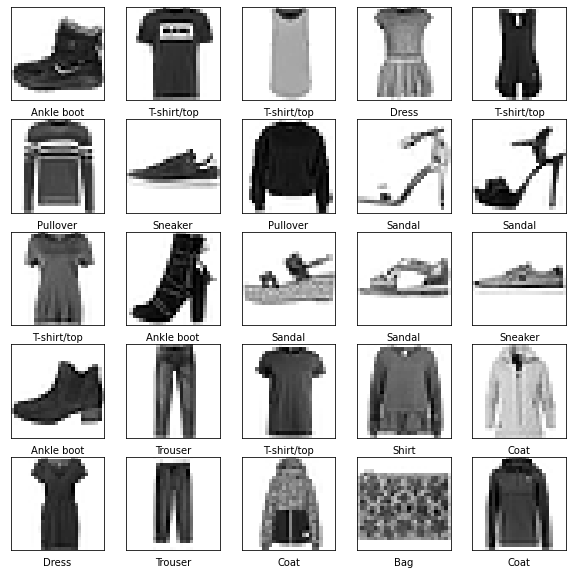

In [10]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [11]:
# Build Model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10)
])

In [12]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [13]:
# Train Model

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4982 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3769 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3394 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3147 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2945 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2800 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2671 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2572 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2469 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(test_loss, test_acc)

313/313 - 1s - loss: 0.3281 - accuracy: 0.8870 - 669ms/epoch - 2ms/step
0.3281191289424896 0.8870000243186951


In [15]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [18]:
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


In [19]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    preddicted_label = np.argmax(predictions_array)
    if preddicted_label == true_label:
        color = "blue"
    else:
        color = "red"
    
    plt.xlabel(f"{class_names[preddicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

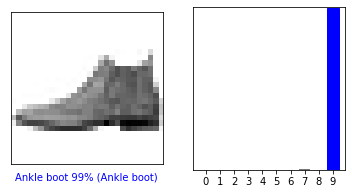

In [20]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

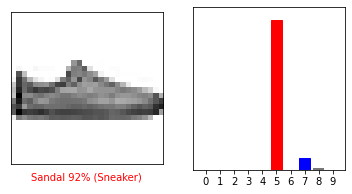

In [21]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

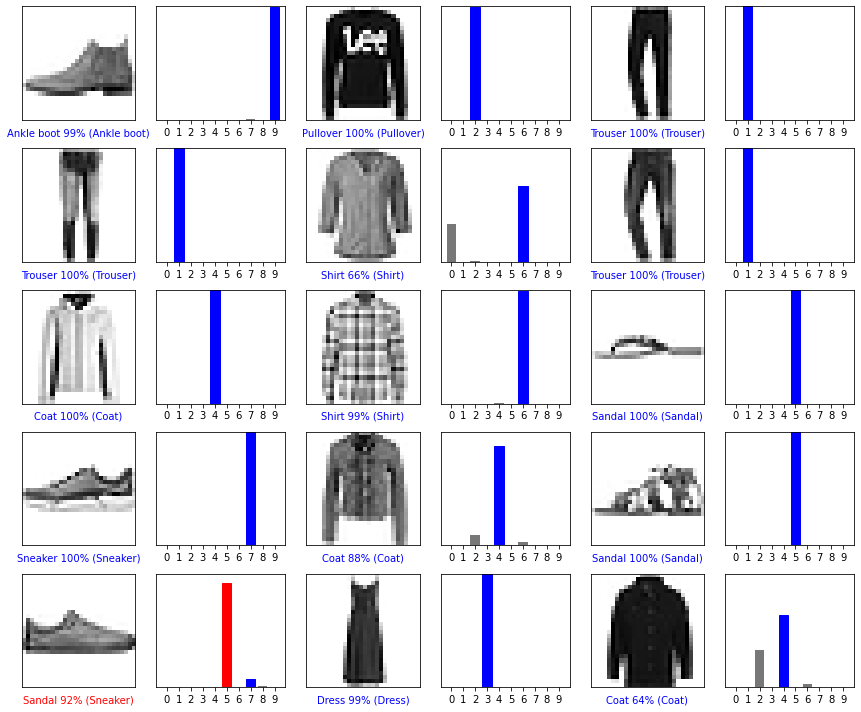

In [22]:
num_rows = 5
num_cols = 3

num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [23]:
img = test_images[1]
print(img.shape)

(28, 28)


In [24]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [25]:
predictions_single = probability_model(img)
print(predictions_single)

tf.Tensor(
[[1.2229752e-05 4.1349828e-13 9.9791068e-01 4.0880330e-09 1.5128908e-03
  4.1269956e-12 5.6410162e-04 1.4375436e-17 8.5131832e-11 3.2599259e-15]], shape=(1, 10), dtype=float32)


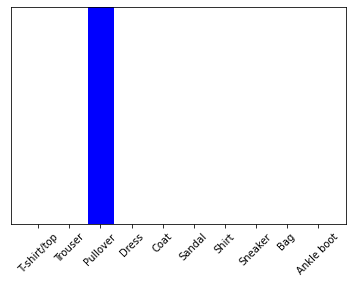

In [26]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [27]:
np.argmax(predictions_single[0])

2

In [28]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.